In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *



In [2]:
from scipy.signal import kaiserord, lfilter, firwin, freqz

In [3]:
import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt
 
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000

16000

In [4]:
 h=[2,    10,    14,     7,    -7,   -17,   -13 ,    3,
    19,    21,     4,   -21,   -32,   -16,    18 ,   43,
    34,    -8,   -51,   -56,   -11,    53,    81 ,   41,
    -44,  -104,   -81,    19,   119,   129,    24 , -119,
    -178,   -88,    95,   222,   171,   -41,  -248 , -266,
    -50,   244,   366,   181,  -195,  -457,  -353 ,   85,
    522,   568,   109,  -540,  -831,  -424,   474 , 1163,
    953,  -245, -1661, -2042,  -463,  2940,  6859 , 9469,
    9969,  6859,  2940,  -463, -2042, -1661,  -245 ,  953,
    1163,   474,  -424,  -831,  -540,   109,   568 ,  522,
    85,  -353,  -457,  -195,   181,   366,   244 ,  -50,
    -266,  -248,   -41,   171,   222,    95,   -88 , -178,
    -119,    24,   129,   119,    19,   -81,  -104 ,  -44,
    41,    81,    53,   -11,   -56,   -51,    -8 ,   34,
    43,    18,   -16,   -32,   -21,     4,    21 ,   19,
    3,   -13,   -17,    -7,     7,    14,    10 ,   -2];

In [5]:
for i in range(128):
    h[i]=h[i]*0.0001

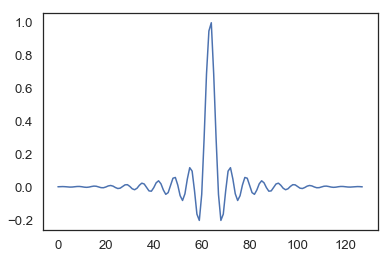

In [36]:
plt.plot(h)

In [49]:

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 15000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000

48000

In [50]:

#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise

array([ 0.00000000e+00,  1.05440572e+00, -4.48287736e-01, ...,
       -6.75165479e-12,  4.48287736e-01, -1.05440572e+00])

In [8]:
# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise

array([ 0.00000000e+00,  1.05440572e+00, -4.48287736e-01, ...,
       -6.75165479e-12,  4.48287736e-01, -1.05440572e+00])

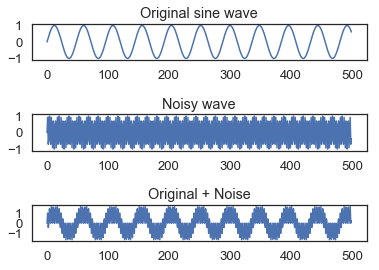

In [51]:

plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=1.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(sine_noise[:500])
 
plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:500])
 
plt.show()

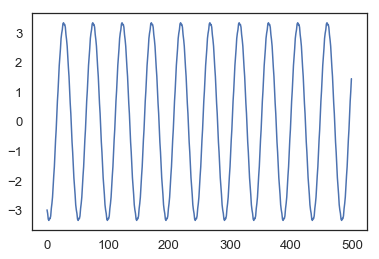

In [68]:
def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    for i in range (sampling_rate):
        acc=0
        for j in range(128):                   
            acc+=h[j]*signal[i-j]
        output[i]= acc
    return output

signal_after_filter=fir_low(combined_signal,sampling_rate)

plt.plot(signal_after_filter[:500])

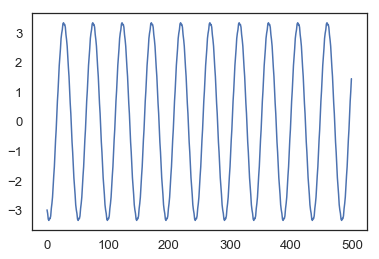

In [62]:
def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    for i in range (sampling_rate):
        acc=0
        for j in range(128):
            acc+=h[j]*signal[i-j]
        output[i]= acc
    return output

signal_after_filter=fir_low(combined_signal,sampling_rate)

plt.plot(signal_after_filter[:500])

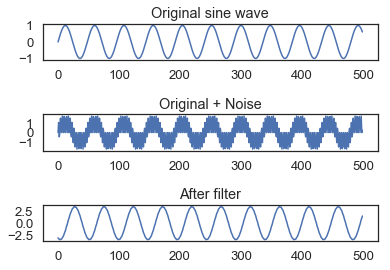

In [55]:

plt.subplot(3,1,1)
 
plt.title("Original sine wave")

plt.subplots_adjust(hspace=1.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:500])
 
plt.subplot(3,1,3)
 
plt.title("After filter")
 
plt.plot(signal_after_filter[:500])
 
plt.show()

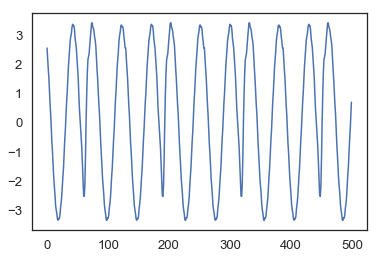

In [33]:
def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    z = ['x' for n in range(len(signal))]
    p=0
    for i in range (sampling_rate):
        acc=0
        p=p+1
        z[p]=signal[i]
        if p>128:
            p=0 
            
        k = p
        for j in range(128):
            acc+=h[j]*signal[k]
            k=k-1 
            if  k<1:
                k=128
            
        output[i]= acc
    return output

a=fir_low(combined_signal,sampling_rate)
plt.plot(a[:500])

In [196]:
for i in range(5):
    for j in range(10):
        
        if j>5:
            break
        print(j)
    
    
    

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5


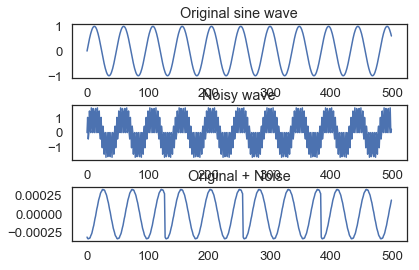

In [149]:
plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(combined_signal[:500])
 
plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(a[:500])
 
plt.show()

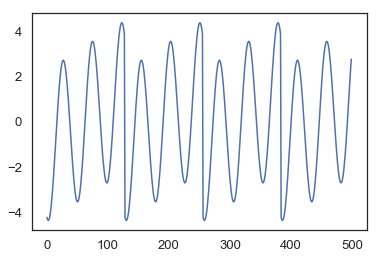

In [19]:
def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    z = ['x' for n in range(sampling_rate)]
    p=0
    for i in range (len(signal)):
        acc=0
        p=p+1
        if p>128:
            p=1
#         z[p]=signal[i]    
        k=p
        for j in range(128):
#             acc+=np.array(h[j])*np.array(z[k])
            acc+=h[j]*signal[k]
            k=k-1
#             if k<1:
#                 k=128 
            
        output[i]=acc
    return output


a=fir_low(combined_signal,sampling_rate)
plt.plot(a[:500])

In [140]:
a=fir_low(combined_signal,sampling_rate)
plt.plot(a[:500])

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

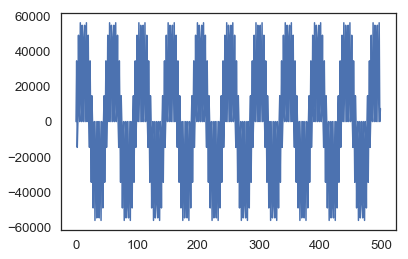

In [88]:
plt.plot(a[:500])

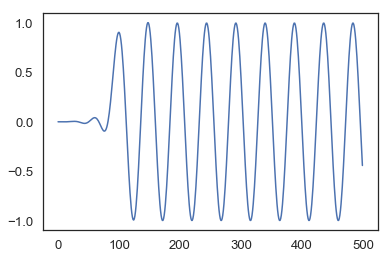

In [59]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sampling_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 1000.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 1500.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, combined_signal)

plt.plot(filtered_x[:500])

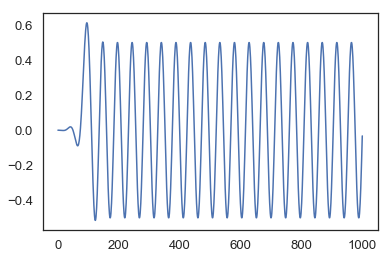